In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
plt.style.use('seaborn-white')
#plt.style.available
#plt.style.use('seaborn-dark-palette')

### Load the interactions summary from Human Promoter Analysis

In [3]:
df = pd.read_csv('TAL-GATA_binaryFeat_Analysis_euclidean_v8/Interactions_Results/interactions_summary_attnLimit-0.12.txt',sep='\t')

In [4]:
df.shape

(3655, 12)

In [5]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval
0,filter2<-->filter4,398,M1110_1.02,0.015905,M0404_1.02,0.039270,336.0,342.0,199.0,1106.0,9.998250e-01,1.000000e+00
1,filter2<-->filter8,402,M1110_1.02,0.015905,M6140_1.02,0.018356,288.0,294.0,311.0,1107.0,1.850862e-02,7.811698e-02
2,filter2<-->filter9,403,M1110_1.02,0.015905,M6256_1.02,0.000012,378.0,96.0,332.0,1489.0,1.720157e-21,3.957354e-20
3,filter2<-->filter13,407,M1110_1.02,0.015905,M0404_1.02,0.000097,420.0,960.0,341.0,1739.0,2.867938e-01,9.017532e-01
4,filter2<-->filter16,410,M1110_1.02,0.015905,M0887_1.02,0.016985,192.0,126.0,283.0,1592.0,1.000000e+00,1.000000e+00


##### keep significant interactions

In [6]:
df = df[df['adjusted_pval']<0.05]

In [7]:
threshold = 0.05
df = df[(df['motif1_qval'] < threshold) & (df['motif2_qval']<threshold)]

In [8]:
df.shape

(1290, 12)

### Load the motif description file to annotate the interactions. 
Here I am using CISBP (U toronto) motif description file. 

In [9]:
df_annotate = pd.read_csv('../Basset_Splicing_IR-iDiffIR/Analysis_For_none_network-typeB_lotus_posThresh-0.60/MEME_analysis/Homo_sapiens_2019_01_14_4_17_pm/TF_Information_all_motifs.txt',sep='\t')

In [10]:
df_annotate.head()

,TF_ID,Family_ID,TSource_ID,Motif_ID,MSource_ID,DBID,TF_Name,TF_Species,TF_Status,Family_Name,...,MSource_Type,MSource_Author,MSource_Year,PMID,MSource_Version,TfSource_Name,TfSource_URL,TfSource_Year,TfSource_Month,TfSource_Day
0,T004843_1.02,F035_1.02,TS19_1.02,M2938_1.02,MS26_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,Transfac,Matys,2006,16381825,2014.2,Ensembl,http://www.ensembl.org/,2011,Oct,26
1,T004843_1.02,F035_1.02,TS19_1.02,M5917_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
2,T004843_1.02,F035_1.02,TS19_1.02,M5918_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
3,T004843_1.02,F035_1.02,TS19_1.02,M5919_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
4,T004843_1.02,F035_1.02,TS19_1.02,M6144_1.02,MS18_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,HocoMoco,Kulakovskiy,2013,23175603,July 2014,Ensembl,http://www.ensembl.org/,2011,Oct,26


In [11]:
def get_annotation(motif_A, annotation_data=None, single_TF = False):
    #motif_A, motif_B = interaction.split('<-->')
    #print(motif_A)
    #print('there')
    TF_A = annotation_data[annotation_data['Motif_ID']==motif_A]['TF_Name']
    #TF_B = annotation_data[annotation_data['Motif_ID']==motif_B]['TF_Name']
    
    ##--If there is no annotation for a given motif--##
    #if len(TF_A)==0:
    TF_A = list(TF_A)
    #if len(TF_B)==0:
    #    TF_B = pd.Series([motif_B])
    ###################################################
    if len(TF_A) == 0:
        TF_A = [motif_A]
    
    if single_TF:
        return TF_A[0]
    else:
        return ','.join(TF_A)
    #print('here')
    #return TF_A

In [12]:
df['TF1'] = df['motif1'].apply(get_annotation, annotation_data = df_annotate,single_TF=True)
df['TF2'] = df['motif2'].apply(get_annotation, annotation_data = df_annotate,single_TF=True)

In [13]:
df['TF_interaction'] = df.apply(lambda x: x['TF1']+r'$\longleftrightarrow$'+x['TF2'], axis=1)

In [14]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction
2,filter2<-->filter9,403,M1110_1.02,0.015905,M6256_1.02,0.000012,378.0,96.0,332.0,1489.0,1.720157e-21,3.957354e-20,HHEX,GATA4,HHEX$\longleftrightarrow$GATA4
7,filter2<-->filter27,421,M1110_1.02,0.015905,M0607_1.02,0.011822,270.0,684.0,413.0,1780.0,1.158462e-04,6.693782e-04,HHEX,KDM2B,HHEX$\longleftrightarrow$KDM2B
22,filter2<-->filter59,453,M1110_1.02,0.015905,M0404_1.02,0.001566,84.0,336.0,252.0,934.0,2.190847e-07,1.715101e-06,HHEX,ZNF202,HHEX$\longleftrightarrow$ZNF202
24,filter2<-->filter64,458,M1110_1.02,0.015905,M0408_1.02,0.008752,294.0,240.0,358.0,1123.0,8.520530e-12,9.739146e-11,HHEX,ZKSCAN1,HHEX$\longleftrightarrow$ZKSCAN1
25,filter2<-->filter65,459,M1110_1.02,0.015905,M0408_1.02,0.000641,588.0,108.0,421.0,1774.0,1.050643e-14,1.496621e-13,HHEX,ZKSCAN1,HHEX$\longleftrightarrow$ZKSCAN1


In [15]:
df = df[df['TF1']!=df['TF2']]

In [16]:
df.shape

(1184, 15)

In [17]:
df.head(10)

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction
2,filter2<-->filter9,403,M1110_1.02,0.015905,M6256_1.02,0.000012,378.0,96.0,332.0,1489.0,1.720157e-21,3.957354e-20,HHEX,GATA4,HHEX$\longleftrightarrow$GATA4
7,filter2<-->filter27,421,M1110_1.02,0.015905,M0607_1.02,0.011822,270.0,684.0,413.0,1780.0,1.158462e-04,6.693782e-04,HHEX,KDM2B,HHEX$\longleftrightarrow$KDM2B
22,filter2<-->filter59,453,M1110_1.02,0.015905,M0404_1.02,0.001566,84.0,336.0,252.0,934.0,2.190847e-07,1.715101e-06,HHEX,ZNF202,HHEX$\longleftrightarrow$ZNF202
24,filter2<-->filter64,458,M1110_1.02,0.015905,M0408_1.02,0.008752,294.0,240.0,358.0,1123.0,8.520530e-12,9.739146e-11,HHEX,ZKSCAN1,HHEX$\longleftrightarrow$ZKSCAN1
25,filter2<-->filter65,459,M1110_1.02,0.015905,M0408_1.02,0.000641,588.0,108.0,421.0,1774.0,1.050643e-14,1.496621e-13,HHEX,ZKSCAN1,HHEX$\longleftrightarrow$ZKSCAN1
29,filter2<-->filter73,467,M1110_1.02,0.015905,M0607_1.02,0.003932,282.0,312.0,403.0,1899.0,1.968777e-08,1.680766e-07,HHEX,KDM2B,HHEX$\longleftrightarrow$KDM2B
32,filter2<-->filter80,474,M1110_1.02,0.015905,M1868_1.02,0.023169,186.0,294.0,248.0,641.0,7.377694e-07,5.451768e-06,HHEX,GATA2,HHEX$\longleftrightarrow$GATA2
34,filter2<-->filter83,477,M1110_1.02,0.015905,M0408_1.02,0.001488,126.0,30.0,372.0,1299.0,1.144216e-08,9.973678e-08,HHEX,ZKSCAN1,HHEX$\longleftrightarrow$ZKSCAN1
36,filter2<-->filter89,483,M1110_1.02,0.015905,M0891_1.02,0.015980,378.0,126.0,397.0,1634.0,1.181389e-03,6.038953e-03,HHEX,TLX2,HHEX$\longleftrightarrow$TLX2
45,filter2<-->filter114,508,M1110_1.02,0.015905,M0891_1.02,0.038392,168.0,48.0,420.0,1519.0,3.104738e-18,5.752728e-17,HHEX,TLX2,HHEX$\longleftrightarrow$TLX2


In [18]:
df = df.reset_index()

#### Fix redundant interaction pairs

In [19]:
all_interactions_dict = []
for i in range(df.shape[0]):
    TF1 = df['TF1'][i]
    TF2 = df['TF2'][i]
    TF_intr = TF1+r'$\longleftrightarrow$'+TF2
    TF_intr_rev = TF2+r'$\longleftrightarrow$'+TF1
    if TF_intr not in all_interactions_dict and TF_intr_rev not in all_interactions_dict:
        all_interactions_dict.append(TF_intr)
    elif TF_intr in all_interactions_dict:
        df['TF_interaction'][i] = TF_intr
    elif TF_intr_rev in all_interactions_dict:
        df['TF_interaction'][i] = TF_intr_rev

/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


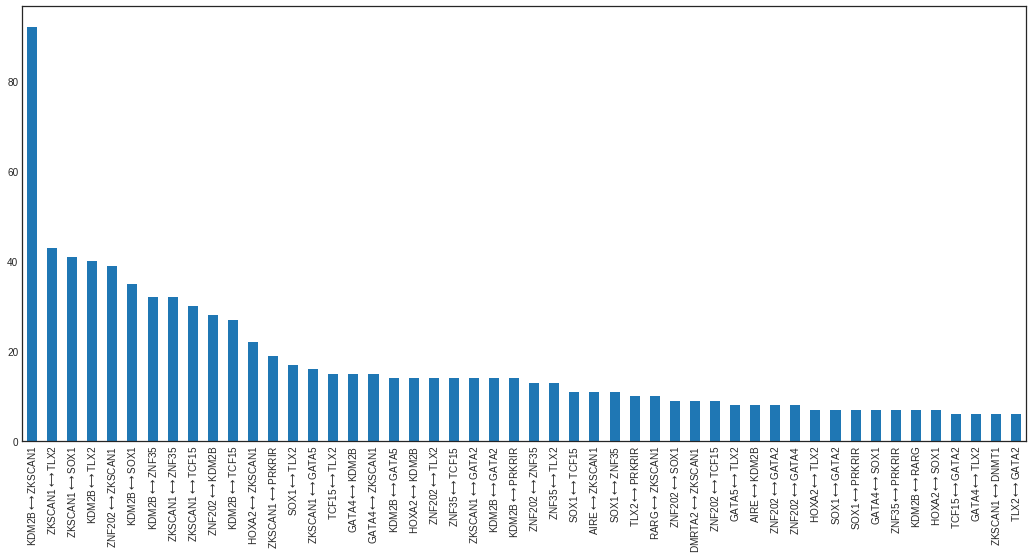

In [20]:
df['TF_interaction'].value_counts()[:50].plot(kind='bar', figsize=(18,8))

### Distribution of mean distance of interaction

Text(0.5, 1.0, 'Distribution of motif interaction distances')

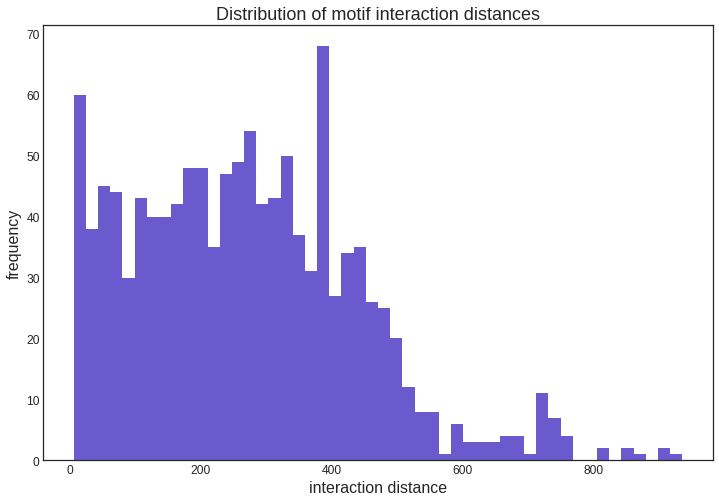

In [21]:
ax = df['mean_distance'].plot(kind='hist',bins=50, figsize=(12,8),color='slateblue',fontsize=12)
ax.set_xlabel("interaction distance",fontsize=16)
ax.set_ylabel("frequency",fontsize=16)
ax.xaxis.set_tick_params(rotation=0)
ax.set_title('Distribution of motif interaction distances',fontsize=18)

In [22]:
df['mean_distance'].mean(),df['mean_distance'].median()

(269.68581081081084, 258.0)

### Most Frequent TF Family Interactions

In [23]:
tf_family_dict = {}
for TF in df_annotate['TF_Name']:
    tf_family_dict[TF] = df_annotate[df_annotate['TF_Name']==TF]['Family_Name'].iloc[0]

In [24]:
df['TF1_Family'] = df['TF1'].apply(lambda x: tf_family_dict[x] if x in tf_family_dict else 'UNKNOWN')
df['TF2_Family'] = df['TF2'].apply(lambda x: tf_family_dict[x] if x in tf_family_dict else 'UNKNOWN')

In [25]:
df.head(10)

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction,TF1_Family,TF2_Family
0,2,filter2<-->filter9,403,M1110_1.02,0.015905,M6256_1.02,0.000012,378.0,96.0,332.0,1489.0,1.720157e-21,3.957354e-20,HHEX,GATA4,HHEX$\longleftrightarrow$GATA4,Homeodomain,GATA
1,7,filter2<-->filter27,421,M1110_1.02,0.015905,M0607_1.02,0.011822,270.0,684.0,413.0,1780.0,1.158462e-04,6.693782e-04,HHEX,KDM2B,HHEX$\longleftrightarrow$KDM2B,Homeodomain,CxxC
2,22,filter2<-->filter59,453,M1110_1.02,0.015905,M0404_1.02,0.001566,84.0,336.0,252.0,934.0,2.190847e-07,1.715101e-06,HHEX,ZNF202,HHEX$\longleftrightarrow$ZNF202,Homeodomain,C2H2 ZF
3,24,filter2<-->filter64,458,M1110_1.02,0.015905,M0408_1.02,0.008752,294.0,240.0,358.0,1123.0,8.520530e-12,9.739146e-11,HHEX,ZKSCAN1,HHEX$\longleftrightarrow$ZKSCAN1,Homeodomain,C2H2 ZF
4,25,filter2<-->filter65,459,M1110_1.02,0.015905,M0408_1.02,0.000641,588.0,108.0,421.0,1774.0,1.050643e-14,1.496621e-13,HHEX,ZKSCAN1,HHEX$\longleftrightarrow$ZKSCAN1,Homeodomain,C2H2 ZF
5,29,filter2<-->filter73,467,M1110_1.02,0.015905,M0607_1.02,0.003932,282.0,312.0,403.0,1899.0,1.968777e-08,1.680766e-07,HHEX,KDM2B,HHEX$\longleftrightarrow$KDM2B,Homeodomain,CxxC
6,32,filter2<-->filter80,474,M1110_1.02,0.015905,M1868_1.02,0.023169,186.0,294.0,248.0,641.0,7.377694e-07,5.451768e-06,HHEX,GATA2,HHEX$\longleftrightarrow$GATA2,Homeodomain,GATA
7,34,filter2<-->filter83,477,M1110_1.02,0.015905,M0408_1.02,0.001488,126.0,30.0,372.0,1299.0,1.144216e-08,9.973678e-08,HHEX,ZKSCAN1,HHEX$\longleftrightarrow$ZKSCAN1,Homeodomain,C2H2 ZF
8,36,filter2<-->filter89,483,M1110_1.02,0.015905,M0891_1.02,0.015980,378.0,126.0,397.0,1634.0,1.181389e-03,6.038953e-03,HHEX,TLX2,HHEX$\longleftrightarrow$TLX2,Homeodomain,Homeodomain
9,45,filter2<-->filter114,508,M1110_1.02,0.015905,M0891_1.02,0.038392,168.0,48.0,420.0,1519.0,3.104738e-18,5.752728e-17,HHEX,TLX2,HHEX$\longleftrightarrow$TLX2,Homeodomain,Homeodomain


In [26]:
df['Family_Interaction'] = df.apply(lambda x: x['TF1_Family']+r'$\longleftrightarrow$'+x['TF2_Family'],axis=1)

In [27]:
all_interactions_dict = []
for i in range(df.shape[0]):
    TF1 = df['TF1_Family'][i]
    TF2 = df['TF2_Family'][i]
    TF_intr = TF1+r'$\longleftrightarrow$'+TF2
    TF_intr_rev = TF2+r'$\longleftrightarrow$'+TF1
    if TF_intr not in all_interactions_dict and TF_intr_rev not in all_interactions_dict:
        all_interactions_dict.append(TF_intr)
    elif TF_intr in all_interactions_dict:
        df['Family_Interaction'][i] = TF_intr
    elif TF_intr_rev in all_interactions_dict:
        df['Family_Interaction'][i] = TF_intr_rev

/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/s/jawar/h/nobackup/fahad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [28]:
df.head()

,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_interaction,TF1_Family,TF2_Family,Family_Interaction
0,2,filter2<-->filter9,403,M1110_1.02,0.015905,M6256_1.02,0.000012,378.0,96.0,332.0,1489.0,1.720157e-21,3.957354e-20,HHEX,GATA4,HHEX$\longleftrightarrow$GATA4,Homeodomain,GATA,Homeodomain$\longleftrightarrow$GATA
1,7,filter2<-->filter27,421,M1110_1.02,0.015905,M0607_1.02,0.011822,270.0,684.0,413.0,1780.0,1.158462e-04,6.693782e-04,HHEX,KDM2B,HHEX$\longleftrightarrow$KDM2B,Homeodomain,CxxC,Homeodomain$\longleftrightarrow$CxxC
2,22,filter2<-->filter59,453,M1110_1.02,0.015905,M0404_1.02,0.001566,84.0,336.0,252.0,934.0,2.190847e-07,1.715101e-06,HHEX,ZNF202,HHEX$\longleftrightarrow$ZNF202,Homeodomain,C2H2 ZF,Homeodomain$\longleftrightarrow$C2H2 ZF
3,24,filter2<-->filter64,458,M1110_1.02,0.015905,M0408_1.02,0.008752,294.0,240.0,358.0,1123.0,8.520530e-12,9.739146e-11,HHEX,ZKSCAN1,HHEX$\longleftrightarrow$ZKSCAN1,Homeodomain,C2H2 ZF,Homeodomain$\longleftrightarrow$C2H2 ZF
4,25,filter2<-->filter65,459,M1110_1.02,0.015905,M0408_1.02,0.000641,588.0,108.0,421.0,1774.0,1.050643e-14,1.496621e-13,HHEX,ZKSCAN1,HHEX$\longleftrightarrow$ZKSCAN1,Homeodomain,C2H2 ZF,Homeodomain$\longleftrightarrow$C2H2 ZF


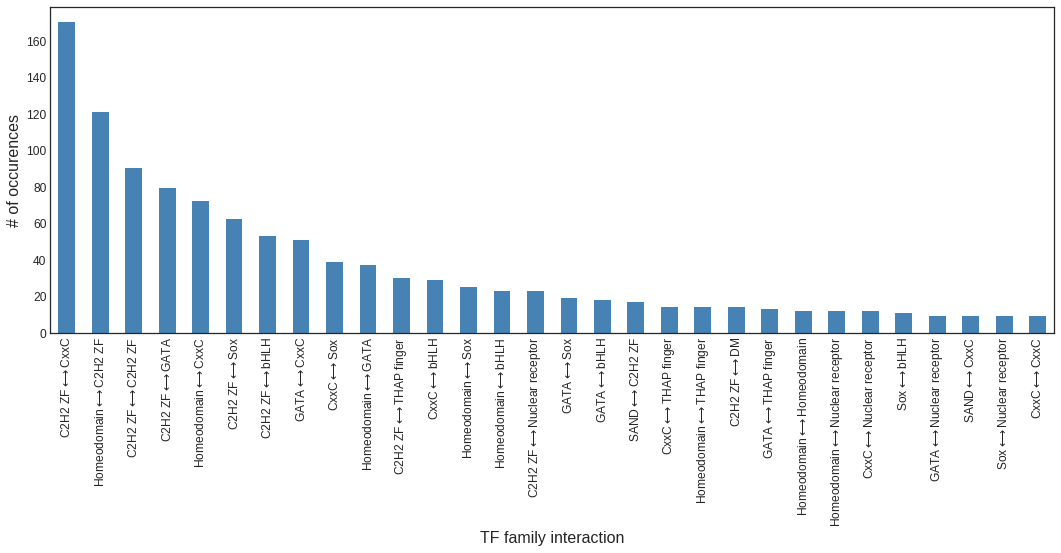

In [32]:
ax = df['Family_Interaction'].value_counts()[:30].plot(kind='bar',color='steelblue',figsize=(18,6),fontsize=12)
ax.set_xlabel("TF family interaction",fontsize=16)
ax.set_ylabel("# of occurences",fontsize=16)
ax.xaxis.set_tick_params(rotation=90)
